### Importing libraries

In [708]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [709]:
plt.style.available
plt.style.use('seaborn-v0_8-darkgrid')

### Importing datasets

In [711]:
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [712]:
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


### Analyzing datasets

In [714]:
# Viewing 3 random rows
matches.sample(3)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
740,1178420,2019,Jaipur,2019-04-27,League,JD Unadkat,Sawai Mansingh Stadium,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,161.0,20.0,N,NaN,A Nand Kishore,YC Barde
488,829769,2015,Mumbai,2015-05-01,League,AT Rayudu,Wankhede Stadium,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,Mumbai Indians,runs,8.0,188.0,20.0,N,NaN,HDPK Dharmasena,CK Nandan
788,1216509,2020/21,NaN,2020-10-17,League,S Dhawan,Sharjah Cricket Stadium,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,wickets,5.0,180.0,20.0,N,NaN,KN Ananthapadmanabhan,RK Illingworth


In [715]:
# Viewing a few rows from end
matches.tail()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [716]:
# Information about dataframe
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [717]:
# Shape of the dataframe
matches.shape

(1095, 20)

In [718]:
matches.drop(columns=['id']).head(2)

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [719]:
# Getting the statistics of all numerical columns of dataframe
matches.drop(columns=['id']).describe()

,result_margin,target_runs,target_overs
count,1076.000000,1092.000000,1092.000000
mean,17.259294,165.684066,19.759341
std,21.787444,33.427048,1.581108
min,1.000000,43.000000,5.000000
25%,6.000000,146.000000,20.000000
50%,8.000000,166.000000,20.000000
75%,20.000000,187.000000,20.000000
max,146.000000,288.000000,20.000000


In [720]:
# Checking if there is null value 
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [721]:
# Filling null values with a specific value in the column
matches.fillna({'method':'Non_DL'},inplace=True)

In [722]:
# Droping rows containing null values
matches.dropna(subset=['city','player_of_match','result_margin','winner','target_runs','target_overs'],inplace=True)

In [723]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [724]:
matches.shape

(1028, 20)

In [725]:
# Checking if there is any duplicate value
matches.duplicated().sum()

0

In [726]:
matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Non_DL,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,Non_DL,MR Benson,SL Shastri


### Number of matches in every season

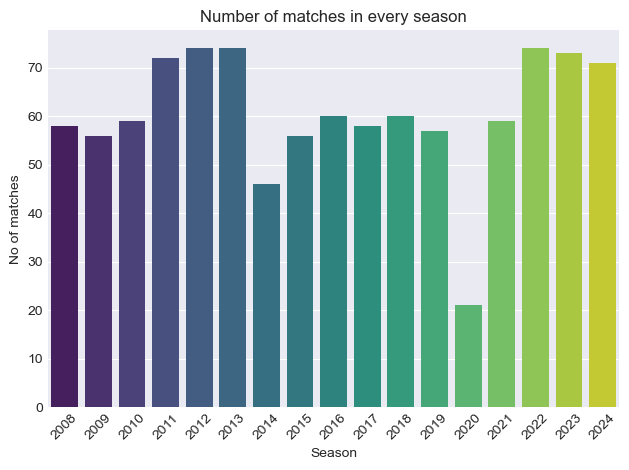

In [728]:
matches['season'] = matches['date'].apply(lambda x : x.split('-')[0])

sns.countplot(x=matches['season'],hue=matches['season'],palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('No of matches')
plt.title("Number of matches in every season")
plt.tight_layout()
plt.show()

### No of matches won by every team

C:\Users\SRISHTI KARMAKAR\AppData\Local\Temp\ipykernel_14484\126755565.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=matches['winner'],order=matches['winner'].value_counts().index,palette='gist_heat')


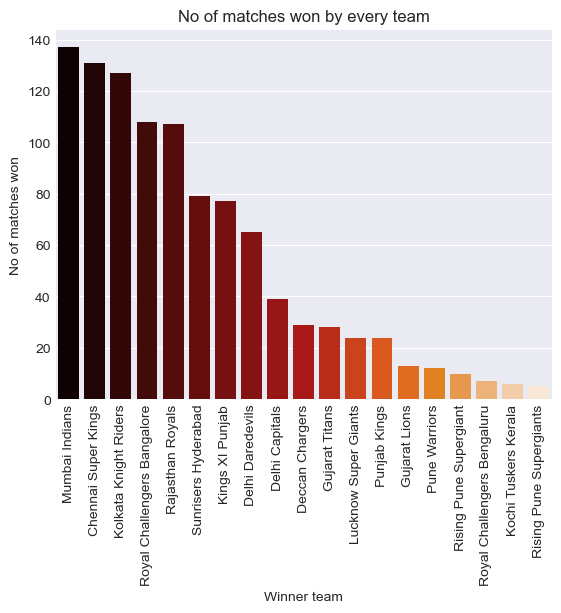

In [730]:
sns.countplot(x=matches['winner'],order=matches['winner'].value_counts().index,palette='gist_heat')
plt.xticks(rotation=90)
plt.xlabel('Winner team')
plt.ylabel('No of matches won')
plt.title('No of matches won by every team')
plt.show()

### Impact of toss decision on match winning

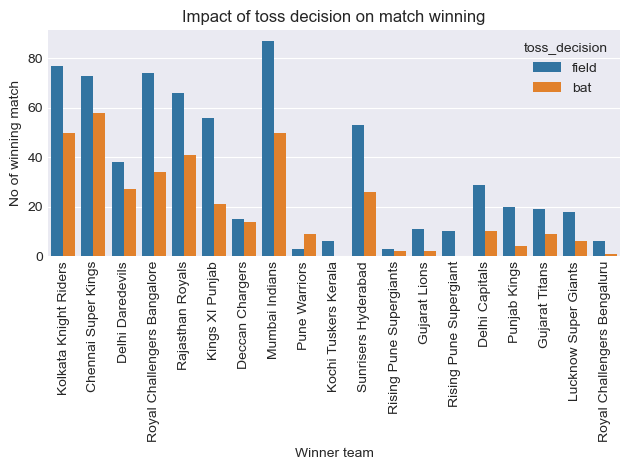

In [732]:
sns.countplot(x=matches['winner'],hue=matches['toss_decision'])
plt.xticks(rotation=90)
plt.xlabel('Winner team')
plt.ylabel('No of winning match')
plt.title('Impact of toss decision on match winning')
plt.tight_layout()
plt.show()

### Top 10 players with Player_of_match award

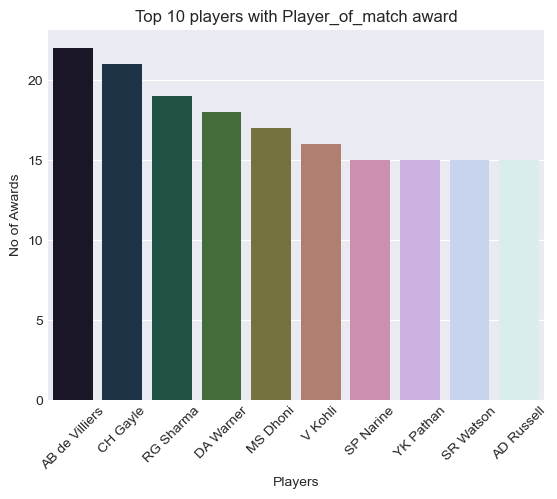

In [734]:
top_players = matches['player_of_match'].value_counts().head(10)

sns.barplot(y=top_players.values,x=top_players.index,hue=top_players.index,palette='cubehelix')
plt.xticks(rotation=45)
plt.xlabel('Players')
plt.ylabel('No of Awards')
plt.title('Top 10 players with Player_of_match award')
plt.show()

### Most IPL season won by teams

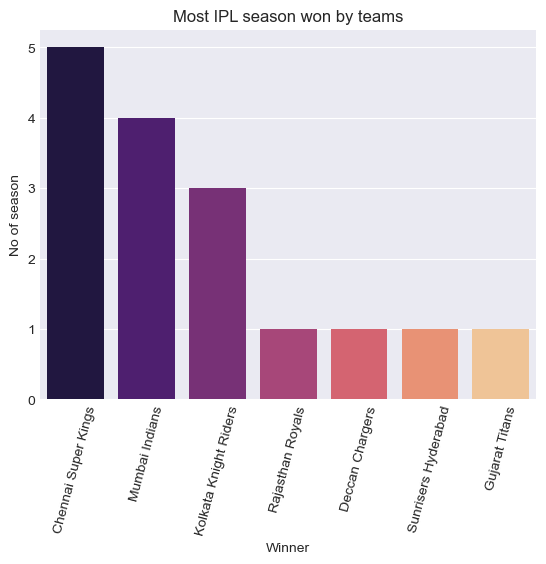

In [736]:
final_matches = matches[matches['match_type']=='Final']

season_won = final_matches['winner'].value_counts()

sns.barplot(x=season_won.index,y=season_won.values,hue=season_won.index,palette='magma')
plt.xticks(rotation=75)
plt.xlabel('Winner')
plt.ylabel('No of season')
plt.title('Most IPL season won by teams')
plt.show()

### Result types

Text(0.5, 1.0, 'Types of results')

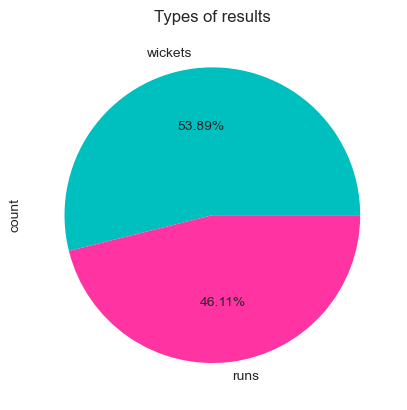

In [738]:
matches['result'].value_counts().plot(kind='pie',autopct='%0.2f%%',colors=['c', '#FF33A1'])
plt.title('Types of results')

In [739]:
matches['toss_decision'].value_counts()

toss_decision
field    664
bat      364
Name: count, dtype: int64

### Toss Decision

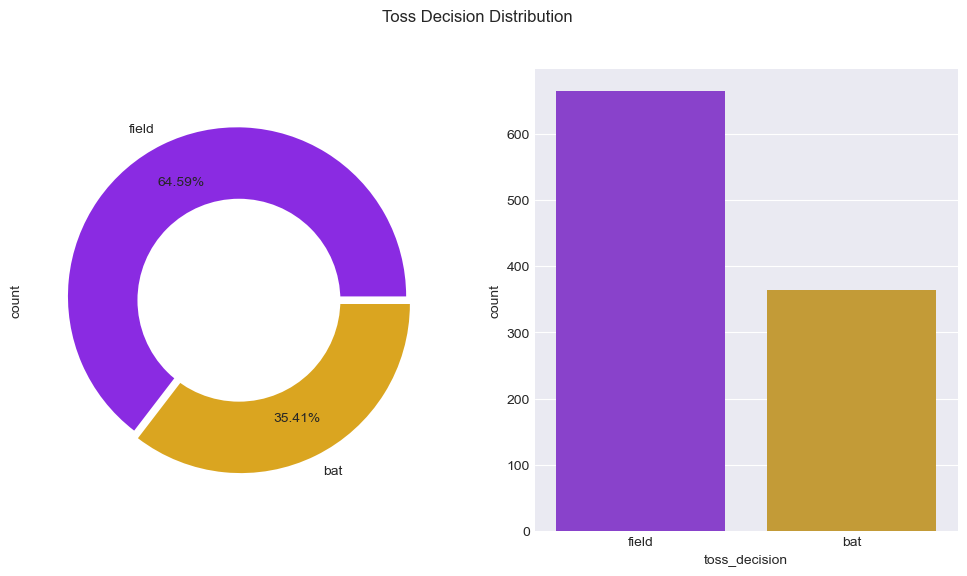

In [741]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
matches['toss_decision'].value_counts().plot(kind='pie',autopct='%0.2f%%',pctdistance=0.75,explode = (0.025,0.025),colors=['blueviolet','goldenrod'])
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(1,2,2)
sns.countplot(x=matches['toss_decision'],hue=matches['toss_decision'], palette=['blueviolet','goldenrod'])
plt.suptitle('Toss Decision Distribution')
matches.value_counts('toss_decision')

plt.show()

### Top cities that have hosted IPL matches

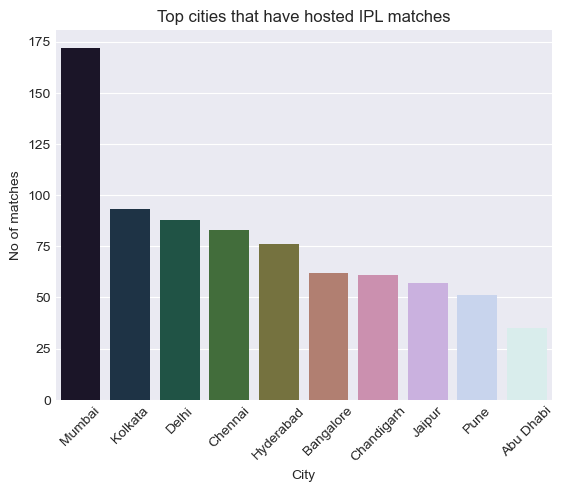

In [743]:
top_cities = matches['city'].value_counts().head(10)

sns.barplot(y=top_cities.values,x=top_cities.index,hue=top_cities.index,palette='cubehelix')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('No of matches')
plt.title('Top cities that have hosted IPL matches')
plt.show()

### Stadium and matches distribution

C:\Users\SRISHTI KARMAKAR\AppData\Local\Temp\ipykernel_14484\2156501164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='venue', data=matches,palette='copper')


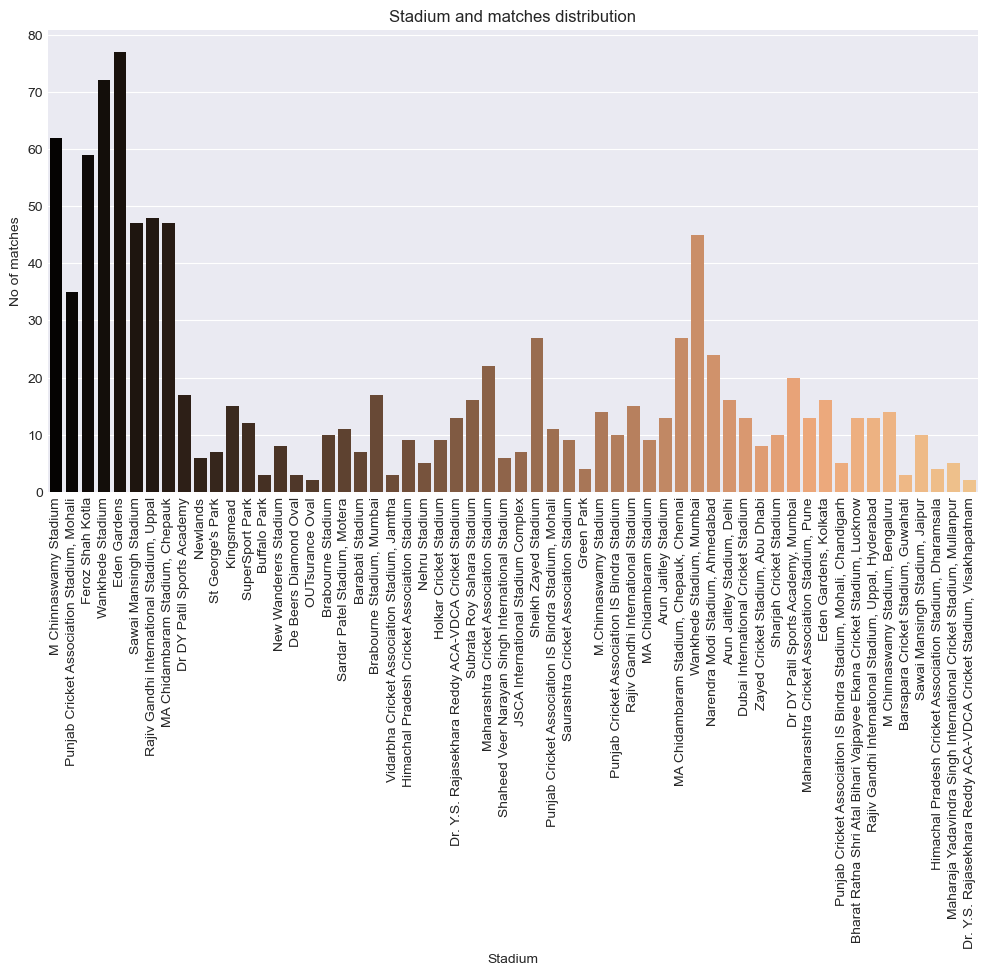

In [745]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches,palette='copper')
plt.xticks(rotation='vertical')
plt.title('Stadium and matches distribution')
plt.xlabel('Stadium')
plt.ylabel('No of matches')
plt.show()

In [746]:
matches['method'].value_counts()

method
Non_DL    1007
D/L         21
Name: count, dtype: int64

### Match decision based on D/L method

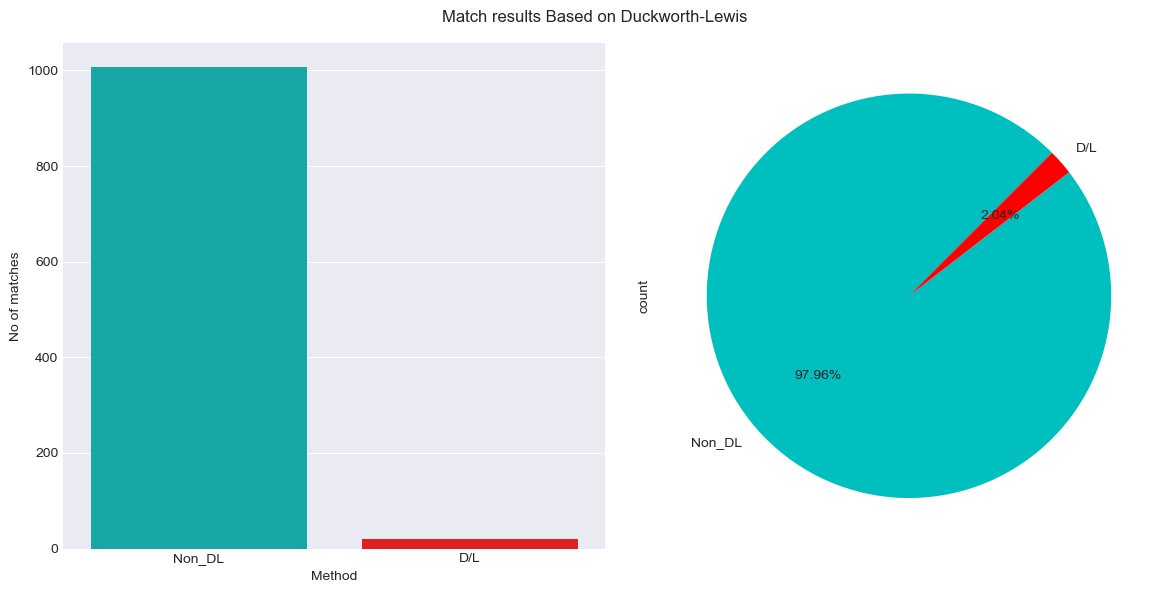

In [748]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x=matches['method'],hue=matches['method'],palette=['c','red'])
plt.xlabel('Method')
plt.ylabel('No of matches')

plt.subplot(1,2,2)
matches['method'].value_counts().plot(kind='pie',autopct='%0.2f%%',startangle=45,colors=['c','red'])

plt.suptitle('Match results Based on Duckworth-Lewis')
plt.tight_layout()
plt.show()

### Top 10 Umpires Assigned to Matches

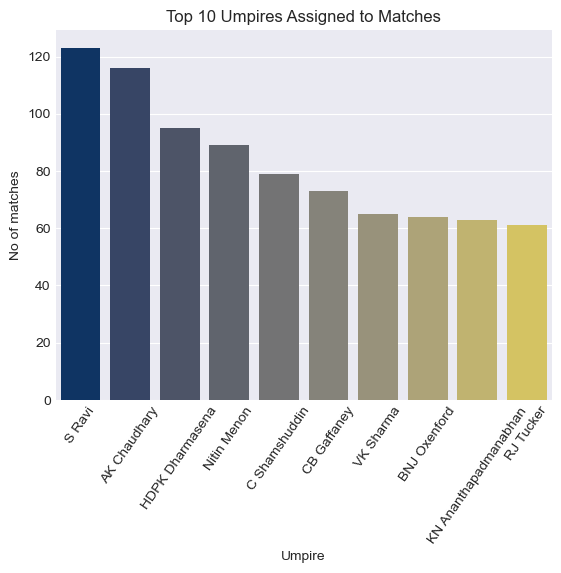

In [750]:
top_10_umpires = pd.concat([matches['umpire1'],matches['umpire2']]).value_counts().head(10)

sns.barplot(x=top_10_umpires.index,y=top_10_umpires.values,hue=top_10_umpires.index,palette='cividis')
plt.xticks(rotation=55)
plt.title('Top 10 Umpires Assigned to Matches')
plt.xlabel('Umpire')
plt.ylabel('No of matches')
plt.show()

### Deliveries dataset analysis

In [752]:
# Shape of dataset
deliveries.shape

(260920, 17)

In [753]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [754]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [755]:
# Droping columns with null values
deliveries=deliveries.dropna(axis=1,how='any')

In [756]:
deliveries.shape

(260920, 13)

In [757]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,0


### Top 15 batsmans with most runs

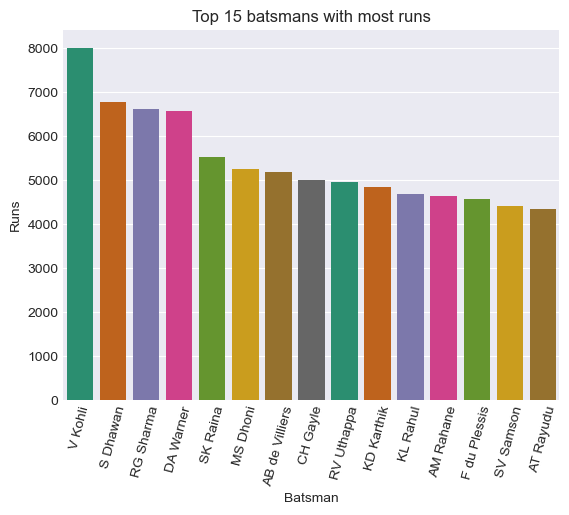

In [759]:
top_15_batsman = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(15)

sns.barplot(x=top_15_batsman.index,y=top_15_batsman.values,hue=top_15_batsman.index,palette='Dark2')
plt.xticks(rotation=75)
plt.title('Top 15 batsmans with most runs')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

### Top 15 bowlers with most wickets

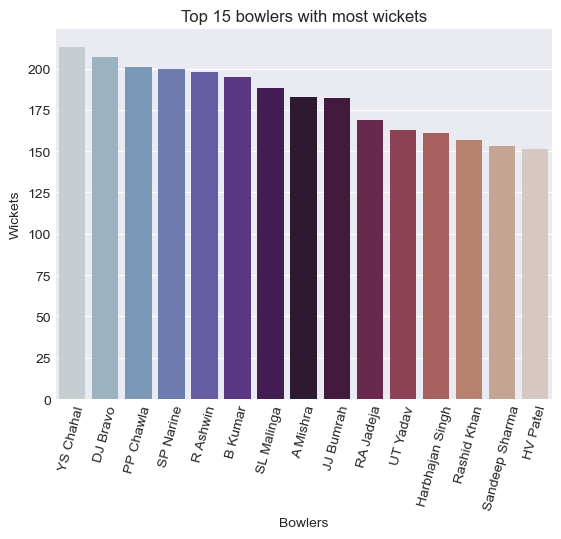

In [761]:
top_15_bowlers = deliveries[deliveries['is_wicket'] == 1].groupby('bowler').size().sort_values(ascending=False).head(15)

sns.barplot(x=top_15_bowlers.index,y=top_15_bowlers.values,hue=top_15_bowlers.index,palette='twilight')
plt.xticks(rotation=75)
plt.title('Top 15 bowlers with most wickets')
plt.xlabel('Bowlers')
plt.ylabel('Wickets')
plt.show()

### Top 15 Bowlers Who Gave the Most Extra Runs

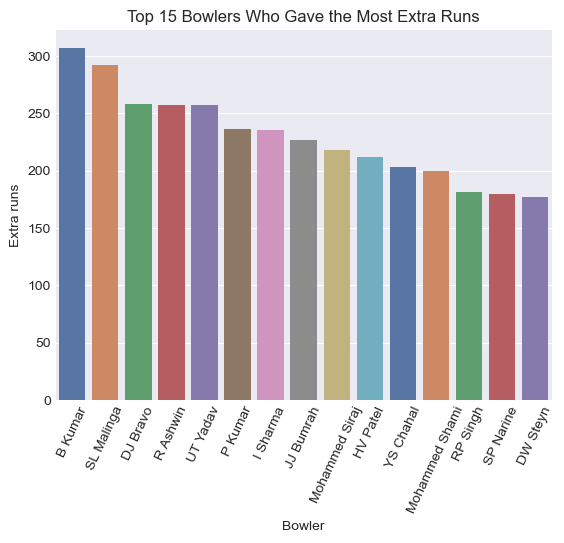

In [763]:
bowler_extra_runs = deliveries.groupby('bowler')['extra_runs'].sum().sort_values(ascending=False).head(15)

sns.barplot(x=bowler_extra_runs.index,y=bowler_extra_runs.values,hue=bowler_extra_runs.index,palette='deep')
plt.xticks(rotation=65)
plt.title('Top 15 Bowlers Who Gave the Most Extra Runs')
plt.xlabel('Bowler')
plt.ylabel('Extra runs')
plt.show()

### Top 15 Bowlers Who Gave the Most Runs

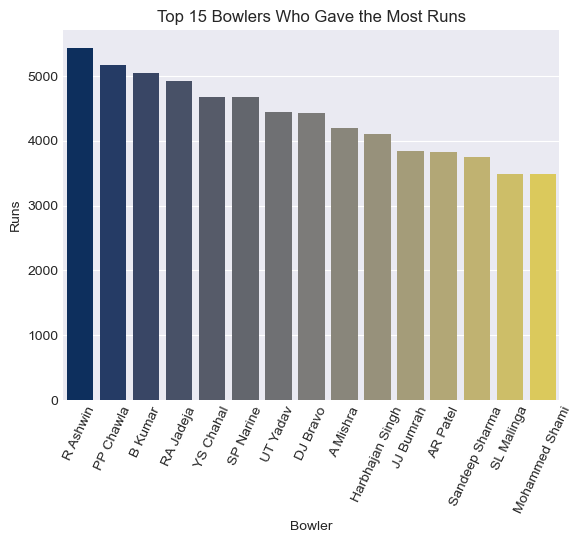

In [765]:
bowler_extra_runs = deliveries.groupby('bowler')['total_runs'].sum().sort_values(ascending=False).head(15)

sns.barplot(x=bowler_extra_runs.index,y=bowler_extra_runs.values,hue=bowler_extra_runs.index,palette='cividis')
plt.xticks(rotation=65)
plt.title('Top 15 Bowlers Who Gave the Most Runs')
plt.xlabel('Bowler')
plt.ylabel('Runs')
plt.show()

In [766]:
deliveries['batsman_runs'].value_counts()

batsman_runs
0    103940
1     96778
4     29850
2     16453
6     13051
3       783
5        65
Name: count, dtype: int64

### Players with more number of boundaries

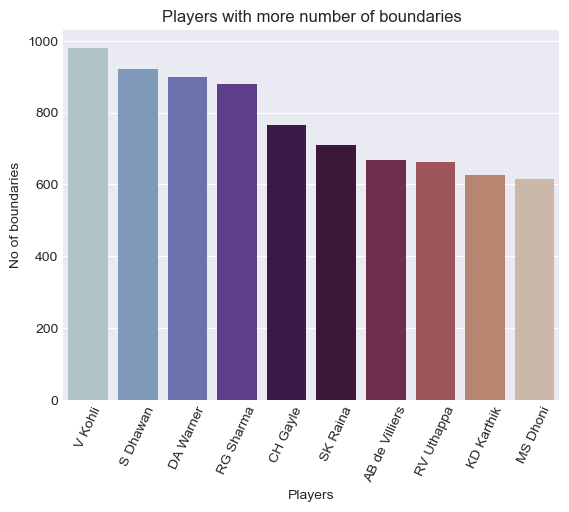

In [768]:
boundaries = deliveries[deliveries['batsman_runs'].isin([4,6])].groupby('batter').size().sort_values(ascending=False).head(10)

sns.barplot(x=boundaries.index,y=boundaries.values,hue=boundaries.index,palette='twilight')
plt.xticks(rotation=65)
plt.title('Players with more number of boundaries')
plt.xlabel('Players')
plt.ylabel('No of boundaries')
plt.show()

### Players with more number of dot balls

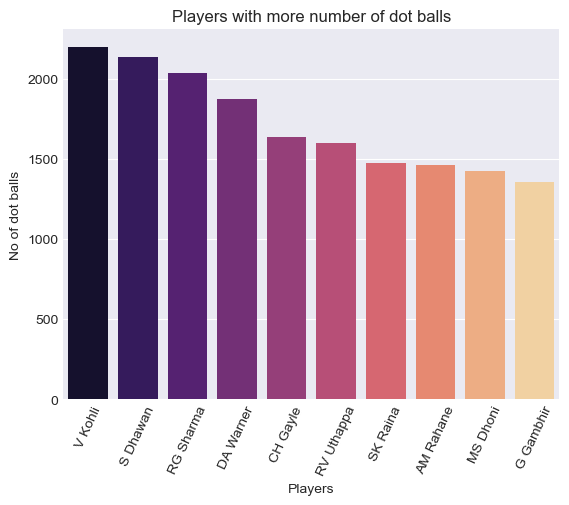

In [770]:
dot_balls = deliveries[deliveries['batsman_runs'] == 0].groupby('batter').size().sort_values(ascending=False).head(10)

sns.barplot(x=dot_balls.index,y=dot_balls.values,hue=boundaries.index,palette='magma',legend=False)
plt.xticks(rotation=65)
plt.title('Players with more number of dot balls')
plt.xlabel('Players')
plt.ylabel('No of dot balls')
plt.show()

### Toss decision taken by team

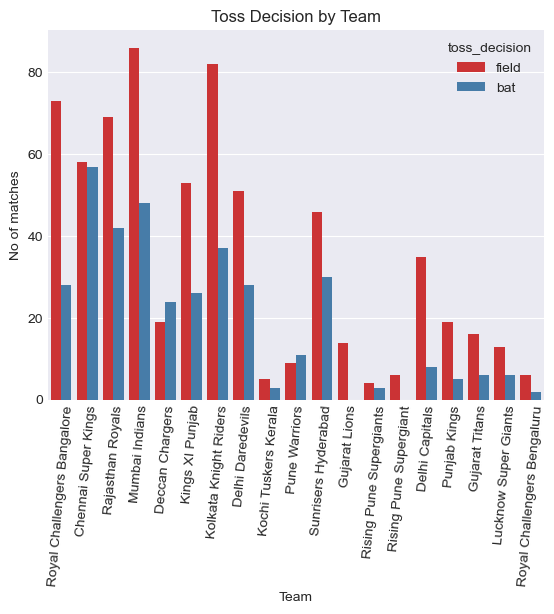

In [772]:
sns.countplot(x='toss_winner', hue='toss_decision', data=matches, palette='Set1')
plt.xticks(rotation=85)
plt.title('Toss Decision by Team')
plt.xlabel('Team')
plt.ylabel('No of matches')
plt.show()

### Total Runs Scored Over-by-Over

In [774]:
# Count the total runs in each over
overwise_runs = deliveries.groupby('over')['total_runs'].sum().reset_index()
overwise_runs.head()

,over,total_runs
0,0,13651
1,1,16163
2,2,17895
3,3,18415
4,4,18565


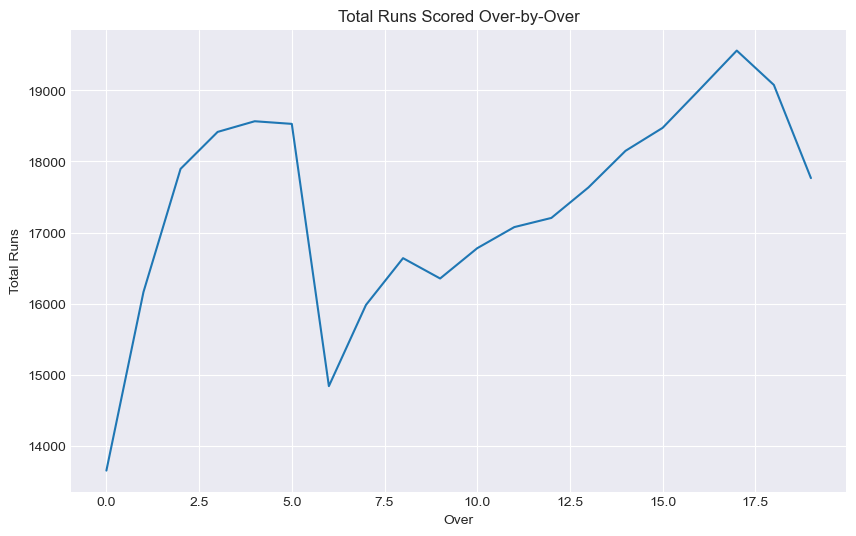

In [775]:
plt.figure(figsize=(10,6))
sns.lineplot(x='over', y='total_runs', data=overwise_runs)
plt.title('Total Runs Scored Over-by-Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()

### Wickets Taken Over-by-Over

In [777]:
# Count the number of wickets in each over
overwise_wickets = deliveries[deliveries['is_wicket'] == 1].groupby('over').size().reset_index(name='wickets')
overwise_wickets.head()

,over,wickets
0,0,463
1,1,503
2,2,533
3,3,548
4,4,576


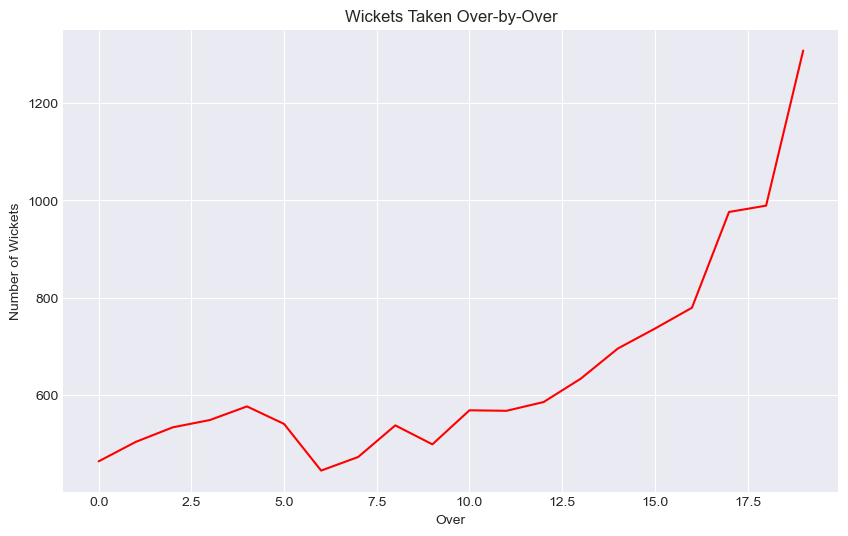

In [778]:
# Plot the wickets taken per over
plt.figure(figsize=(10,6))
sns.lineplot(x='over', y='wickets', data=overwise_wickets, color='red')
plt.title('Wickets Taken Over-by-Over')
plt.xlabel('Over')
plt.ylabel('Number of Wickets')
plt.show()

### Strike Rate Over-by-Over

In [780]:
# Group by 'over' and calculate runs and balls faced in each over
overwise_stats = deliveries.groupby('over').agg(total_runs=('total_runs', 'sum'), balls=('ball', 'count')).reset_index()

# Calculate strike rate
overwise_stats['strike_rate'] = (overwise_stats['total_runs'] / overwise_stats['balls']) * 100

overwise_stats.head()

,over,total_runs,balls,strike_rate
0,0,13651,13906,98.166259
1,1,16163,13773,117.352792
2,2,17895,13597,131.609914
3,3,18415,13575,135.653775
4,4,18565,13560,136.910029


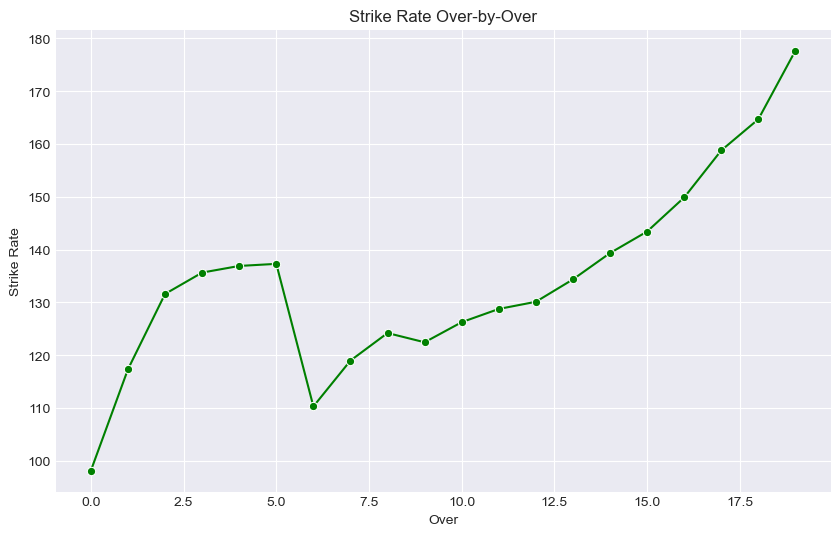

In [781]:
# Plot the strike rate per over
plt.figure(figsize=(10,6))
sns.lineplot(x='over', y='strike_rate', data=overwise_stats, marker='o', color='green')
plt.title('Strike Rate Over-by-Over')
plt.xlabel('Over')
plt.ylabel('Strike Rate')
plt.show()